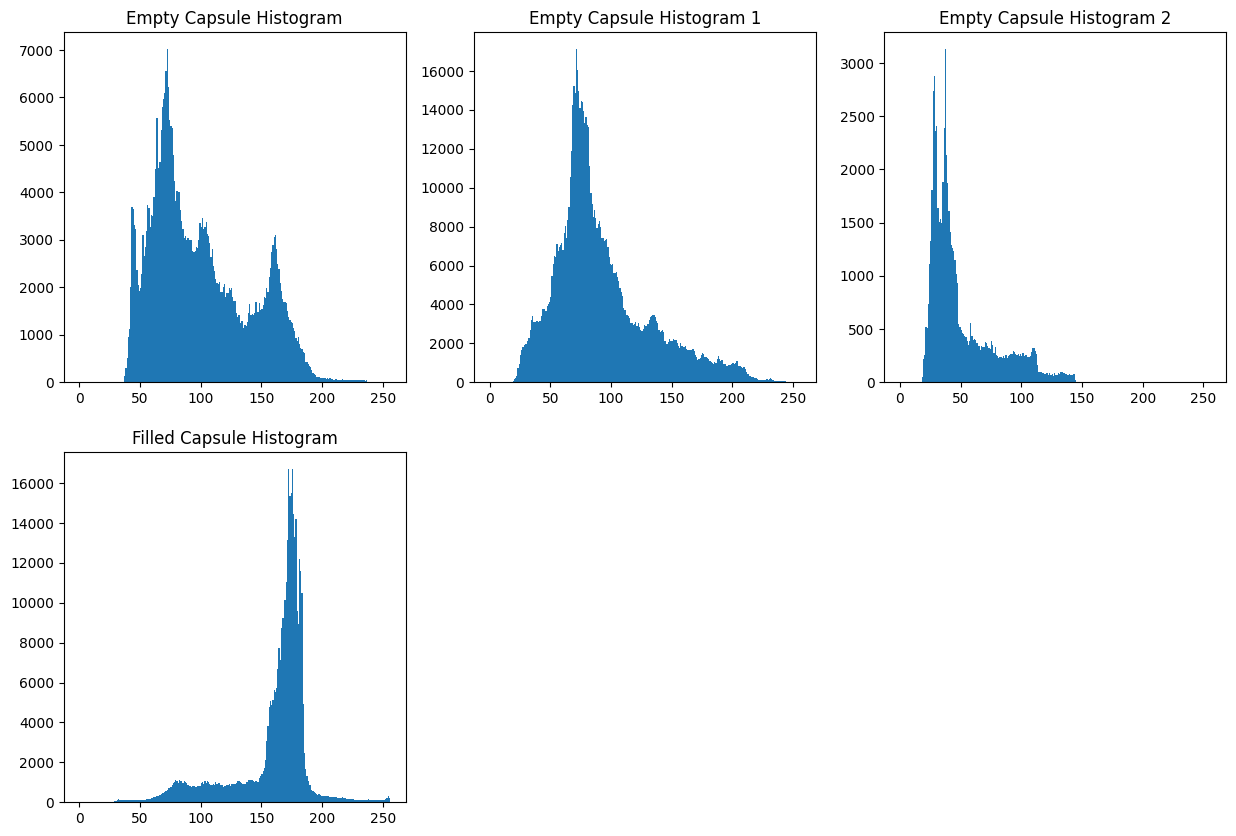

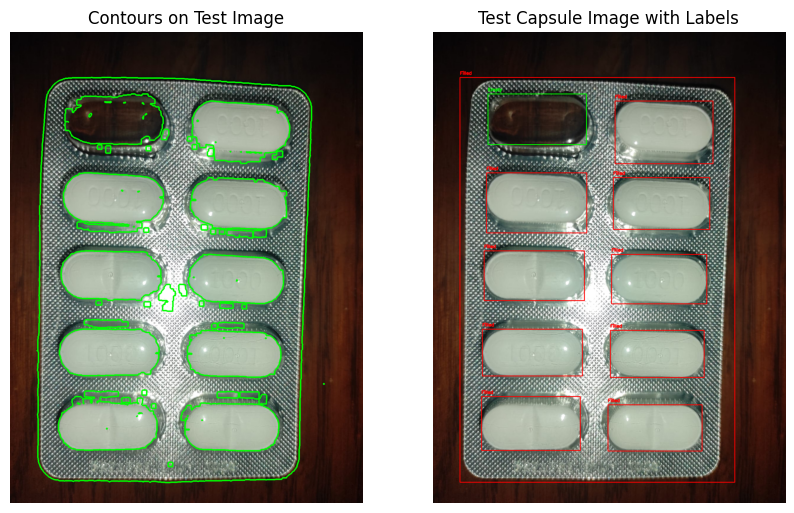

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
"""
Description of our project, algorithm, aim.

Taking photographs of empty and filled capsules, using these photographs as templates,
detecting objects in the photograph to be tested with the help of these templates, and determining whether the drug capsule is filled or not.

Algorithm:In our algorithm, first 5 photos are taken from the user. One of these photos is of a filled capsule,three of them are of an empty capsule.
We apply various operations on these capsules, such as preprocessing, filtering, morphological operations, and finally turn them into a template.
One of the points that should be taken into consideration is that, as a result of our experiments, the process of distinguishing an empty capsule becomes more difficult
due to the whiteness of the inside and the more symmetrical distribution of the colors. That's why 3 empty capsule photos were added and more filters and pre-processing
were applied. After completing these templates, we upload the test photo. We need to search in the test photo and we can do this search through other photos that
we have set as templates. We also subject the photo we have determined as a template to pre-process and filters. Since the next action we will do will be the search process,
we will extract the histogram of these 4 capsule photos respectively, as stated in the same project report. These histograms will allow us to search on the test photo
Likewise, we use the Canny method to detect edges on the test photo to search row by row using histograms. After the contours and edge detection are taken care of,
when the shapes appear, the histogram cycle is checked respectively and thus it will be revealed whether a capsule is empty or filled.


We would also like to mention some of the bad experiences and shortcomings we experienced in the application we use:

Since we do not work under professional conditions, we do not have very isolated conditions such as a darkroom and lighting or powerful cameras,
so many parameters such as a small angle difference and the amount of light received made it extremely difficult for us to process
While doing the project, we made many different experiments, tried different photographs and different places, there were cases where our algorithm worked very accurately
but in rare cases where it did not work very well, it may be due to not being able to isolate environmental conditions. The algorithm we use can work much better under professional
and isolated working conditions, since we have generally hand-arranged the codes in the algorithm we use by trying various functions
such as ("w", "h" values, kernel size in morphological operations, the function used for filters or contours).

(We added what it does sequentially next to each piece of code through comment lines)

The references we use are similar to the articles in the report we sent in the visa project. Especially with the search algorithm in the pharmaceutical industry
(Huvaida Manzoor “Application of Digital Image Processing in Drug Industry” IOSR Journal of Computer Engineering (IOSR-JCE) e-ISSN: 2278-0661,p-ISSN: 2278-8727, Volume 19, Issue 1, Ver. II (Jan.-Feb. 2017), PP 55-60).
The difference here was that we could not come across a histogram-based approach during our research and wanted to try it. AI , Chat GPT were used in coding.
"""

# Image upload ---- we upload a template, 1 full and 3 empty, and then a photo of the drug package we will search on these templates.
empty_capsule_image = cv2.imread("/content/bos.jpeg", cv2.IMREAD_COLOR)
empty_capsule_image1 = cv2.imread("/content/bos1.jpeg", cv2.IMREAD_COLOR)
empty_capsule_image2 = cv2.imread("/content/bos4.jpeg", cv2.IMREAD_COLOR)
filled_capsule_image = cv2.imread("/content/dolu.jpeg", cv2.IMREAD_COLOR)
test_capsule_image = cv2.imread("/content/deneme3.jpeg", cv2.IMREAD_COLOR)

# A function to preprocess operations that we have to use.
def preprocess_image(image):
    image_blurred = cv2.GaussianBlur(image, (7, 7), 7)
    image_gray = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2GRAY)
    return image_gray

# Preprocess empty and filled capsule images
empty_capsule_image_preprocessed = preprocess_image(empty_capsule_image)
empty_capsule_image_preprocessed1 = preprocess_image(empty_capsule_image1)
empty_capsule_image_preprocessed2 = preprocess_image(empty_capsule_image2)
filled_capsule_image_preprocessed = preprocess_image(filled_capsule_image)

# We implement  preprocess filter operations to 1 filled and 3 empty capsules then a more effective and high-value filter was used for the 3 empty capsules
# Because the colors in the empty capsules are more transparent and distributed, which will be useful in removing noise and unwanted points.
empty_capsule_image_preprocessed = cv2.GaussianBlur(empty_capsule_image_preprocessed, (41, 41), 13)
empty_capsule_image_preprocessed1 = cv2.GaussianBlur(empty_capsule_image_preprocessed1, (41, 41), 13)
empty_capsule_image_preprocessed2 = cv2.GaussianBlur(empty_capsule_image_preprocessed2, (41, 41), 13)

# Calculate histograms for empty and filled capsules
empty_capsule_hist = cv2.calcHist([empty_capsule_image_preprocessed], [0], None, [256], [0, 256])
empty_capsule_hist1 = cv2.calcHist([empty_capsule_image_preprocessed1], [0], None, [256], [0, 256])
empty_capsule_hist2 = cv2.calcHist([empty_capsule_image_preprocessed2], [0], None, [256], [0, 256])
filled_capsule_hist = cv2.calcHist([filled_capsule_image_preprocessed], [0], None, [256], [0, 256])

# Normalize histograms
empty_capsule_hist = cv2.normalize(empty_capsule_hist, empty_capsule_hist).flatten()
empty_capsule_hist1 = cv2.normalize(empty_capsule_hist1, empty_capsule_hist1).flatten()
empty_capsule_hist2 = cv2.normalize(empty_capsule_hist2, empty_capsule_hist2).flatten()
filled_capsule_hist = cv2.normalize(filled_capsule_hist, filled_capsule_hist).flatten()

# Plot histograms
plt.figure(figsize=(15, 10))

# In the previous steps, we had applied the necessary pre-processing for 1 filled and 3 empty capsules and prepared them to turn them into a histogram.
# Now, in this case, we show all 4 histograms one by one as output to the screen. (There will be 3 histograms for empty and 1 filled, filled is more easy to analyze)
plt.subplot(2, 3, 1)
plt.title("Empty Capsule Histogram")
plt.hist(empty_capsule_image_preprocessed.ravel(), 256, [0, 256])

plt.subplot(2, 3, 2)
plt.title("Empty Capsule Histogram 1")
plt.hist(empty_capsule_image_preprocessed1.ravel(), 256, [0, 256])

plt.subplot(2, 3, 3)
plt.title("Empty Capsule Histogram 2")
plt.hist(empty_capsule_image_preprocessed2.ravel(), 256, [0, 256])

plt.subplot(2, 3, 4)
plt.title("Filled Capsule Histogram")
plt.hist(filled_capsule_image_preprocessed.ravel(), 256, [0, 256])

# This time, we need to perform our operations on test_image, which is the image we will search on, so various pre-processes,
# Morphological operations and filtering operations will be adjusted sequentially, although they vary depending on the photo to be selected.
test_capsule_preprocessed = preprocess_image(test_capsule_image)

# Gaussian Blur
test_capsule_blurred = cv2.GaussianBlur(test_capsule_preprocessed, (9, 9), 3)

# Apply adaptive threshold to the test image
test_capsule_threshold = cv2.adaptiveThreshold(test_capsule_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Morphological
kernel = np.ones((15, 15), np.uint8)
test_capsule_morph = cv2.morphologyEx(test_capsule_threshold, cv2.MORPH_CLOSE, kernel)


# image we want to search on must be detected piece by piece, respectively, and in the part where each detection process will be applied,
# detection will be made by comparing it with the 4 histograms we have, and determining which histogram is more similar.
# To ensure that these determinations can be made, we need to use the Canny edge detection method and find the contours.
edges = cv2.Canny(test_capsule_morph, 30, 300)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Since there will be many parameters when determining the contours of the photo,
# we added the function of visualizing the contours and showing them to us in order to control them,
# because in the numerous experiments we made, we saw that sometimes we could not get the output we wanted with rectangles.
# one of the reasons for this was that the contours could not be drawn well enough, because if you cannot draw the contours well,
# it is not possible to detect them, histograms. They will be drawn and searched respectively according to these contours.
contour_image = test_capsule_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 3)

# similarity threshold for histogram comparison
similarity_threshold = 0.4

# determine if each capsule is empty or filled
# Code of the part to be scanned with the histogram with the loop we mentioned above, the "w" and "h" variables here symbolize the contours to be taken into account
# and you can find more small contours or larger contours by playing with the number of contours to be taken into account
# this is another parameter that you can change by trying it manually according to the conditions you choose.
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    if w > 75 and h > 45:  # Skip invalid small contours
        capsule_roi = test_capsule_image[y:y+h, x:x+w]
        capsule_roi_preprocessed = preprocess_image(capsule_roi)

        capsule_hist = cv2.calcHist([capsule_roi_preprocessed], [0], None, [256], [0, 256])
        capsule_hist = cv2.normalize(capsule_hist, capsule_hist).flatten()

        empty_similarity = cv2.compareHist(capsule_hist, empty_capsule_hist, cv2.HISTCMP_CORREL)
        empty_similarity1 = cv2.compareHist(capsule_hist, empty_capsule_hist1, cv2.HISTCMP_CORREL)
        empty_similarity2 = cv2.compareHist(capsule_hist, empty_capsule_hist2, cv2.HISTCMP_CORREL)
        filled_similarity = cv2.compareHist(capsule_hist, filled_capsule_hist, cv2.HISTCMP_CORREL)

# There is a control application here, it is placed in green or red squares depending on the similarity rate.
# An output is provided by comparing the Threshold value and whether it is empty or occupied with rectangles (red: filled, green: empty).
        if empty_similarity > filled_similarity and empty_similarity > similarity_threshold:
            label = "Empty"
            color = (0, 255, 0)  # Green for "Empty"
        elif empty_similarity1 > filled_similarity and empty_similarity1 > similarity_threshold:
            label = "Empty"
            color = (0, 255, 0)  # Green for "Empty"
        elif empty_similarity2 > filled_similarity and empty_similarity2 > similarity_threshold:
            label = "Empty"
            color = (0, 255, 0)  # Green for "Empty"
        elif filled_similarity > empty_similarity and filled_similarity > similarity_threshold:
            label = "Filled"
            color = (0, 0, 255)  # Red for "Filled"
        else:
            continue  # Skip if not confident

        # Draw rectangle and label
        cv2.rectangle(test_capsule_image, (x, y), (x+w, y+h), color, 2)
        cv2.putText(test_capsule_image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the contours
plt.figure(figsize=(10, 10))  # Genişlik ve yükseklik belirtilebilir
plt.subplot(1, 2, 1)
plt.title("Contours on Test Image")
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Show the result
plt.subplot(1, 2, 2)
plt.title("Test Capsule Image with Labels")
plt.imshow(cv2.cvtColor(test_capsule_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
